In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

/home/rodrigords/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


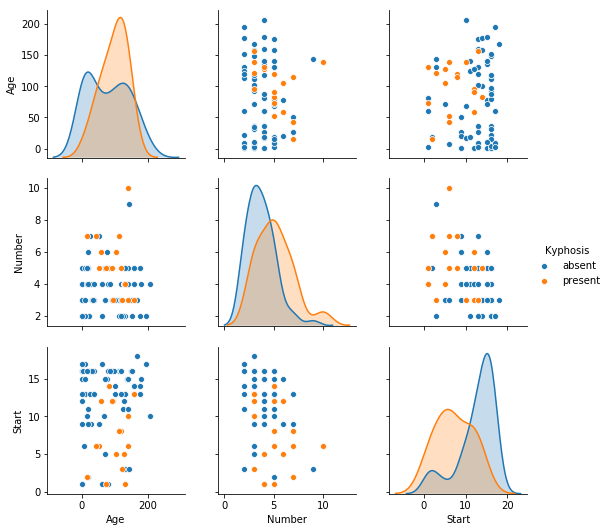

In [4]:
sns.pairplot(df, hue='Kyphosis')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree = DecisionTreeClassifier()

In [18]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
y_predict = dtree.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

      absent       0.94      0.81      0.87        21
     present       0.43      0.75      0.55         4

   micro avg       0.80      0.80      0.80        25
   macro avg       0.69      0.78      0.71        25
weighted avg       0.86      0.80      0.82        25



In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rfc = RandomForestClassifier(n_estimators=200) # árvore aleatória

In [24]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
rfc_pred = rfc.predict(X_test)

In [26]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       1.00      0.90      0.95        21
     present       0.67      1.00      0.80         4

   micro avg       0.92      0.92      0.92        25
   macro avg       0.83      0.95      0.88        25
weighted avg       0.95      0.92      0.93        25

